# **Lab4: Network Analysis (Prominence)**

* **Practical example of Facebook socia media analysis**

## **Practical example of Facebook socia media analysis**

We will start with facebook dataset provided by [**SNAP (Stanford Network Analysis Project)**](http://snap.stanford.edu/index.html)
<p align="left">
  <img src="http://snap.stanford.edu/images/snap_logo.png"  width="200">
</p>

The SNAP library is being actively developed since 2004 and is organically growing as a result of Stanford University research pursuits in analysis of large social and information networks. The [datasets](http://snap.stanford.edu/data/index.html) available on the website were mostly collected for the purpose of research.

In this session, we will use the **ego-Facebook** dataset, where you can download from [here](http://snap.stanford.edu/data/ego-Facebook.html).

### **ego-Facebook Dataset Information**

The dataset includes node features (profiles), circles (or 'friends lists'), and ego networks from Facebook.

An **ego network** is defined as a portion of a social network formed of a given individual, termed ``ego``, and the other persons with whom she has a social relationship, termed ``alters``.

<p align="left">
  <img src="https://ars.els-cdn.com/content/image/1-s2.0-S014036641500465X-gr1.jpg"  width="350">
</p>


### **Dataset statistics**

<table align='left'>
  <tr>
    <th><font size="3">Nodes</th>
    <td><font size="3">4039</td>
  </tr>
  <tr>
    <th><font size="3">Edges</th>
    <td><font size="3">88234</td>
  </tr>
  <tr>
    <th><font size="3">Average clustering coefficient</th>
    <td><font size="3">0.6055</td>
  </tr>
  <tr>
    <th><font size="3">Number of triangles</th>
    <td><font size="3">1612010</td>
  </tr>
  <tr>
    <th><font size="3">Diameter (longest shortest path)</th>
    <td><font size="3">8</td>
  </tr>
</table>



In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/***your directory path***/
%pwd

In [0]:
# Read in the file and construct the Graph (undirected graph)
G_fb = nx.read_edgelist("./ego-Facebook/facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

In [0]:
# You can define by yourself
print('Number of nodes: ', len(G_fb.nodes))
print('Number of edges: ', len(G_fb.edges))
print('Average degree: ', round(sum([v for n, v in nx.degree(G_fb)])/len(G_fb.nodes), 4))
# Or simply use the info function
print(nx.info(G_fb))

Number of nodes:  4039
Number of edges:  88234
Average degree:  43.691
Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


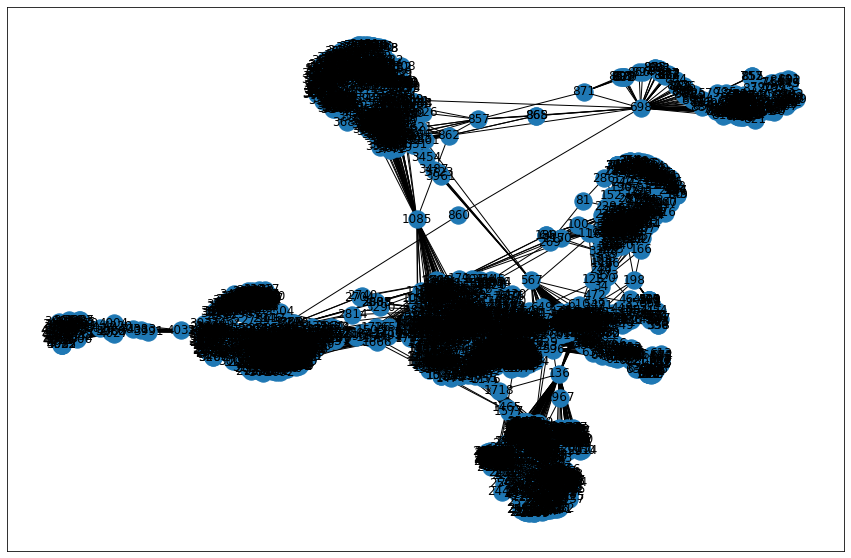

CPU times: user 1min 5s, sys: 699 ms, total: 1min 6s
Wall time: 1min 6s


In [0]:
%%time
nx.draw_networkx(G_fb)
fig = plt.gcf()
fig.set_size_inches(15 , 10)
plt.show()

### **Connected Components**

* **Undirected Graph**:
  - **Connected Component**: maximal subgraph while each pair of nodes is connected by a path.

* **Directed Graph**:
  - **Strong Connected Component (SCC)**: maximal subgraph in which every vertex can be reached from every other vertex by following directed arcs. 
  - **Weakly Connected Component (WCC)**: maximal subgraph in which every vertex can be reached from every other vertex by following lines in either direction (i.e. ignore direction).

In [0]:
# Since here is an undirected graph
# See more here: https://networkx.github.io/documentation/stable/reference/algorithms/component.html
print("Number of connected components: ", nx.number_connected_components(G_fb))

Number of connected components:  1


### **Prominence**

Find out who are the most important nodes in a social network?

* **Centrality**: check which node (i.e. friend) is involved in many edges (i.e. relationship)
  - **Degree Centrality**: the fraction of nodes it is connected to. Degree of node $u$ divided by the maximal possible degree (i.e. number of nodes in the graph subtract by 1)

  $$C_D(u) =\frac{deg(u)}{n-1}\tag{undirected}$$
  $$C_D(u) =\frac{deg^{out}(u)}{n-1}\tag{directed}$$

  - **Betweenness Centrality**: how many pairs of individuals would have to go through you in order to reach one another in the minimum number of hops. Betweenness centrality of a node $v$ is then defined as the sum of the fraction of all-pairs shortest paths that pass through $u$. Here $V$ is the set of nodes, $\sigma(s, t)$ is the number of shortest $(s,t)$-paths, and $\sigma(s, t|u)$ is the number of those paths passing through some node $u$ other than $s,t$.
$$C_B(u) =\sum_{s,t \in V} \frac{\sigma(s, t|u)}{\sigma(s, t)}$$

      - **Normalized**: $n$ is the number of nodes in the graph

  $$C^{'}_B(u) = \frac{C_B(u)}{(\frac{(n-1)(n-2)}{2})} \tag{undirected}$$
  $$C^{'}_B(u) = \frac{C_B(u)}{(n-1)(n-2)} \tag{directed}$$

  - **Closeness Centrality**: focus on how close a node $u$ is to all the other nodes in the network. It is based on the length of the average shortest path between a node and all the other nodes (i.e. $k-1$ reachable nodes) in the graph. Here $d(u, v)$ is the shortest-path distance between $u$ and $v$. 
  $$C_C(u) = \frac{1}{\sum_{v=1}^{k-1} d(u, v)}$$

      - **Normalized**: $k-1$ is the number of nodes that can reach $u$. 

  $$C^{'}_C(u) = \frac{k - 1}{\sum_{v=1}^{k-1} d(u, v)}$$




* **Prestige**: Take the direction of arc into account (i.e. directed graph)
  - **Degree Prestige / Popularity**: the node which is more prestigious when having more other nodes point to it (i.e. higher in-degree value). It is considered as the fraction of nodes its incoming edges are connected to. In-degree of node $u$ divided by the maximal possible in-degree (i.e. number of nodes in the graph subtract by 1) ```nx.in_degree_centrality(DiGraph)```

  $$C_{D_{in}}(u) =\frac{deg^{in}(u)}{n-1}$$

  - **Proximity Prestige**: Measure based on the distance of input domains. Input domain of a node in a directed graph is the number or percentage of all other nodes that are connected by a path to this node. Direct nominations (i.e. choices) should count more than indirect nominations. Here $n$ is the number of nodes in the graph and $d(i, u)$ is the distance between node $i$ and node $u$.
   $$C_P(u) =\frac{\text{fraction of all nodes that are in u's input domain} }{\text{average distance from u to other nodes in the input domain}} = \frac{\frac{|I_u|}{(n-1)}}{\frac{\sum_{i \in I_u} d(i, u)}{|I_u|}}$$

  - **Page Rank**: more prestigious if a node has lots of other prestigious people in the input domain. [Check more here](https://networkx.github.io/documentation/stable/reference/algorithms/link_analysis.html)


In [0]:
#nx.degree_centrality(Actor_nw_sym_weight)
#nx.betweenness_centrality(Actor_nw_sym_weight, normalized =True)
#nx.closeness_centrality(Actor_nw_sym_weight)

In [0]:
# Closeness Centrality (Take some time to run)
print('Top 10 based on the normalized closeness centrality score:\n', {id: round(cls_central,5) for id, cls_central in sorted(nx.closeness_centrality(G_fb).items(), key=lambda item: item[1], reverse=True)[:10]})

Top 10 based on the normalized closeness centrality score:
 {107: 0.4597, 58: 0.3974, 428: 0.39484, 563: 0.39391, 1684: 0.39361, 171: 0.37049, 348: 0.36992, 483: 0.36985, 414: 0.36954, 376: 0.36656}


In [0]:
# Degree Centrality & Betweenness Centrality (Take some time to run)
# More to check here: https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html#degree
# What do you discover?
print('Top 10 based on the degree centrality score:\n', {id: round(deg_central,5) for id, deg_central in sorted(nx.degree_centrality(G_fb).items(), key=lambda item: item[1], reverse=True)[:10]})
print('Top 10 based on the betweenness centrality score:\n', {id: round(btw_central,5) for id, btw_central in sorted(nx.betweenness_centrality(G_fb, normalized =False).items(), key=lambda item: item[1], reverse=True)[:10]})
print('Top 10 based on the normalized betweenness centrality score:\n', {id: round(btw_central,5) for id, btw_central in sorted(nx.betweenness_centrality(G_fb, normalized =True).items(), key=lambda item: item[1], reverse=True)[:10]})

Top 10 based on the degree centrality score:
 {107: 0.25879, 1684: 0.19614, 1912: 0.18697, 3437: 0.13546, 0: 0.08593, 2543: 0.07281, 2347: 0.07207, 1888: 0.0629, 1800: 0.06067, 1663: 0.0582}
Top 10 based on the betweenness centrality score:
 {107: 3916560.14444, 1684: 2753286.68691, 3437: 1924506.15157, 1912: 1868918.21226, 1085: 1214577.75836, 0: 1192496.11308, 698: 940024.24648, 567: 784996.90559, 58: 687594.98337, 428: 524164.06778}
Top 10 based on the normalized betweenness centrality score:
 {107: 0.48052, 1684: 0.3378, 3437: 0.23612, 1912: 0.2293, 1085: 0.14902, 0: 0.14631, 698: 0.11533, 567: 0.09631, 58: 0.08436, 428: 0.06431}


#### **What is the concept here, if a node is having:**
* High betweenness_centrality but relatively low degree_centrality
* High degree_centrality but relatively low betweenness_centrality

<p align="left">
  <img src="https://image3.slideserve.com/5757539/slide26-l.jpg"  width="500">
</p>


CPU times: user 3min 50s, sys: 172 ms, total: 3min 50s
Wall time: 3min 52s


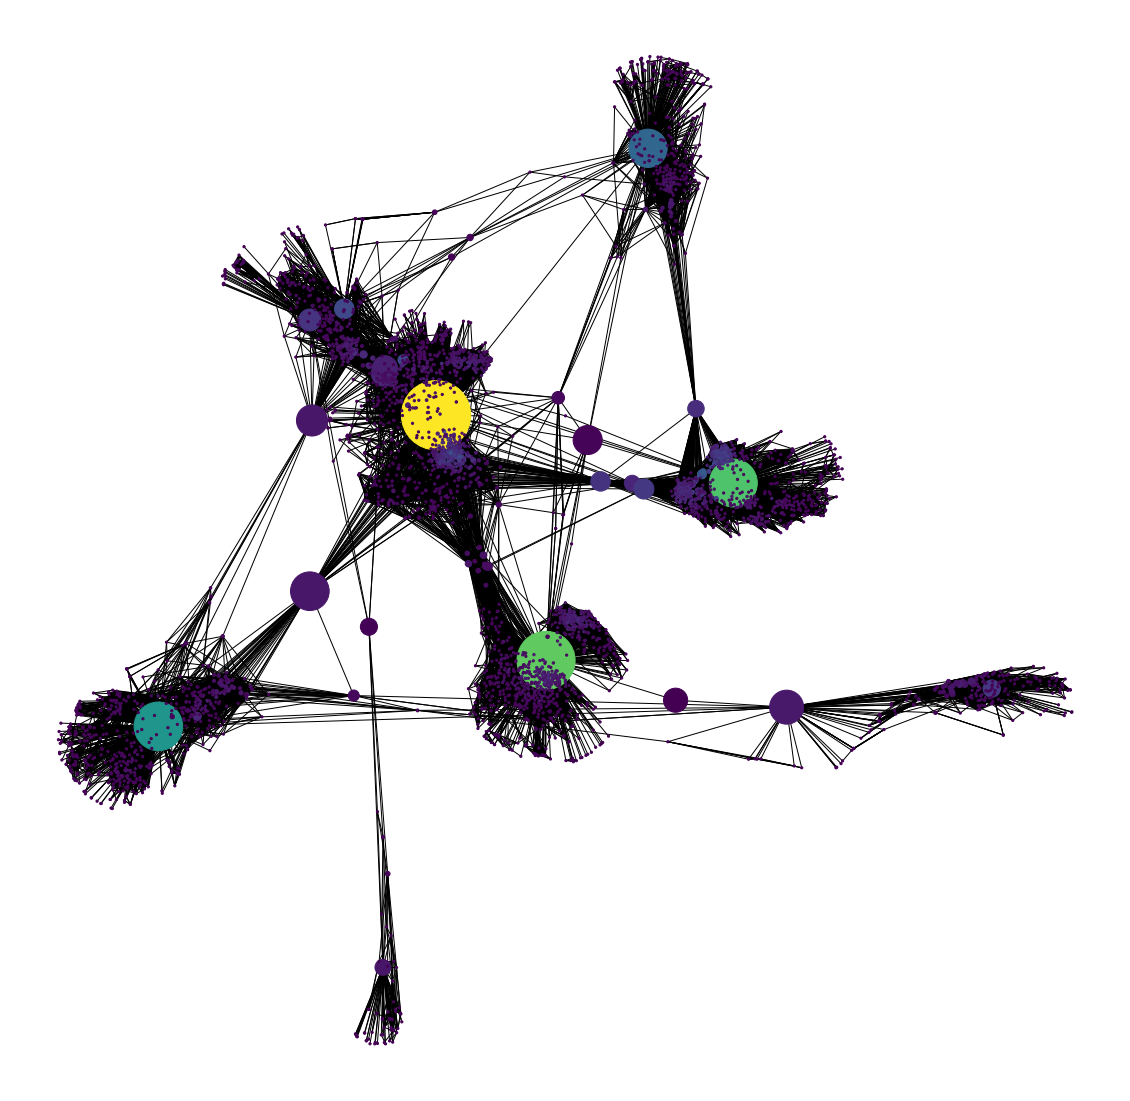

In [0]:
%%time
### Take some time to run
# Node size -> betweeness centrality
# Color -> degree centrality
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

### **Directed Graph**

<p align="left">
  <img src="https://static.cambridge.org/binary/version/id/urn:cambridge.org:id:binary:20180713144112937-0144:9781108565691:61386fig9_4.png?pub-status=live"  width="500">
</p>


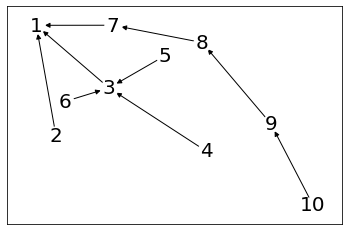

In [0]:
d = nx.DiGraph()
d.add_edges_from([('10', '9'), ('9', '8'),('8', '7'),('7', '1'),('2', '1'),('3', '1'),('4', '3'),('5', '3'),('6', '3')])
nx.draw_networkx(d, node_color='white', font_size=20)

In [0]:
## Degree Prestige
degree_prestige = dict((v,len(d.in_edges(v))/(len(d.nodes())-1)) for v in d.nodes())
degree_prestige = nx.in_degree_centrality(d)
print("Degree Prestige :\n")
for i in degree_prestige:
    print(i, " : ", degree_prestige[i])

Degree Prestige :

10  :  0.0
9  :  0.1111111111111111
8  :  0.1111111111111111
7  :  0.1111111111111111
1  :  0.3333333333333333
2  :  0.0
3  :  0.3333333333333333
4  :  0.0
5  :  0.0
6  :  0.0


In [0]:
## Proximity Prestige
distance = []

temp_dis = 0
n = 0
for dest in d.nodes:
    temp_dis = 0
    n = 0
    for src in d.nodes:
        if (nx.has_path(d,src,dest) == True):
            temp_dis = temp_dis + nx.shortest_path_length(d,source = src,target = dest)
            n = n + 1
    if temp_dis == 0:
        distance.append([dest, 0])
    else:
        len_input_domain = n-1
        len_nodes = len(d.nodes)
        proximity = (len_input_domain/(len_nodes-1))/(temp_dis/len_input_domain)
        distance.append([dest, proximity])
        #distance.append([dest, temp_dis/(n - 1)])
print("Proximity Prestige :\n")
for i in distance:
    print(str(i[0]) + " : " + str(i[1]))

Proximity Prestige :

10 : 0
9 : 0.1111111111111111
8 : 0.14814814814814814
7 : 0.16666666666666666
1 : 0.5
2 : 0
3 : 0.3333333333333333
4 : 0
5 : 0
6 : 0


In [0]:
## Rank Prestige
prominence = np.random.randint(1, 4, size=len(d.nodes))
print("Assume Prominence for each node :\n")
for n, p in zip(d.nodes, prominence):
    print(str(n) + " : " + str(p))
rank_prestige = np.zeros([len(d.nodes)], dtype = int)

path_matrix = np.zeros([len(d.nodes), len(d.nodes)], dtype = int)
i = 0
j = 0
for src in d.nodes:
    for dest in d.nodes:
        if d.has_edge(dest, src):
            path_matrix[i][j] = 1
        j = j+1
    j = 0
    i = i+1
for i in range(n_nodes):
    pr_i = 0
    for j in range(n_nodes):
        pr_i = pr_i + path_matrix[i][j] * prominence[j]
    rank_prestige[i] = pr_i

print("Rank Prestige :\n")
for n, r in zip(d.nodes, rank_prestige):
    print(str(n) + " : " + str(r))

Assume Prominence for each node :

10 : 3
9 : 1
8 : 2
7 : 3
1 : 1
2 : 3
3 : 3
4 : 1
5 : 1
6 : 1
Rank Prestige :

10 : 0
9 : 3
8 : 1
7 : 2
1 : 3
2 : 0
3 : 0
4 : 0
5 : 0
6 : 0


## **Source**

1. https://networkx.github.io/documentation/networkx-2.2/

2. http://snap.stanford.edu/data/index.html

3. https://www.datacamp.com/community/tutorials/social-network-analysis-python

4. https://openflights.org/data.html

5. https://medium.com/@pankajmishrajec/a-day-with-network-analysis-in-python-using-networkx-d9ac446b4eec

6. https://stackoverflow.com/questions/52057984/degree-proximity-and-rank-prestige
